In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('data/housing.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
df.head()
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
len(df)
df.shape
df.columns
df.index

506

(506, 14)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

RangeIndex(start=0, stop=506, step=1)

In [8]:
df['CHAS'].value_counts()
df['RAD'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

RAD
24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: count, dtype: int64

In [9]:
df.iloc[0]
type(df.iloc[0])

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
MEDV        24.00000
Name: 0, dtype: float64

pandas.core.series.Series

In [10]:
df.iloc[:2]
type(df.iloc[:2])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


pandas.core.frame.DataFrame

In [11]:
df.iloc[:2, 0]
type(df.iloc[:2, 0])

0    0.00632
1    0.02731
Name: CRIM, dtype: float64

pandas.core.series.Series

In [12]:
df.loc[[0, 2, 5]]
df.loc[[0, 2, 5], ['TAX', 'DIS']]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


,TAX,DIS
0,296.0,4.0900
2,242.0,4.9671
5,222.0,6.0622


In [13]:
df.loc[[0, 2, 5], 'TAX']
type(df.loc[[0, 2, 5], 'TAX'])

df.loc[[0, 2, 5], ['TAX']]
type(df.loc[[0, 2, 5], ['TAX']])

0    296.0
2    242.0
5    222.0
Name: TAX, dtype: float64

pandas.core.series.Series

,TAX
0,296.0
2,242.0
5,222.0


pandas.core.frame.DataFrame

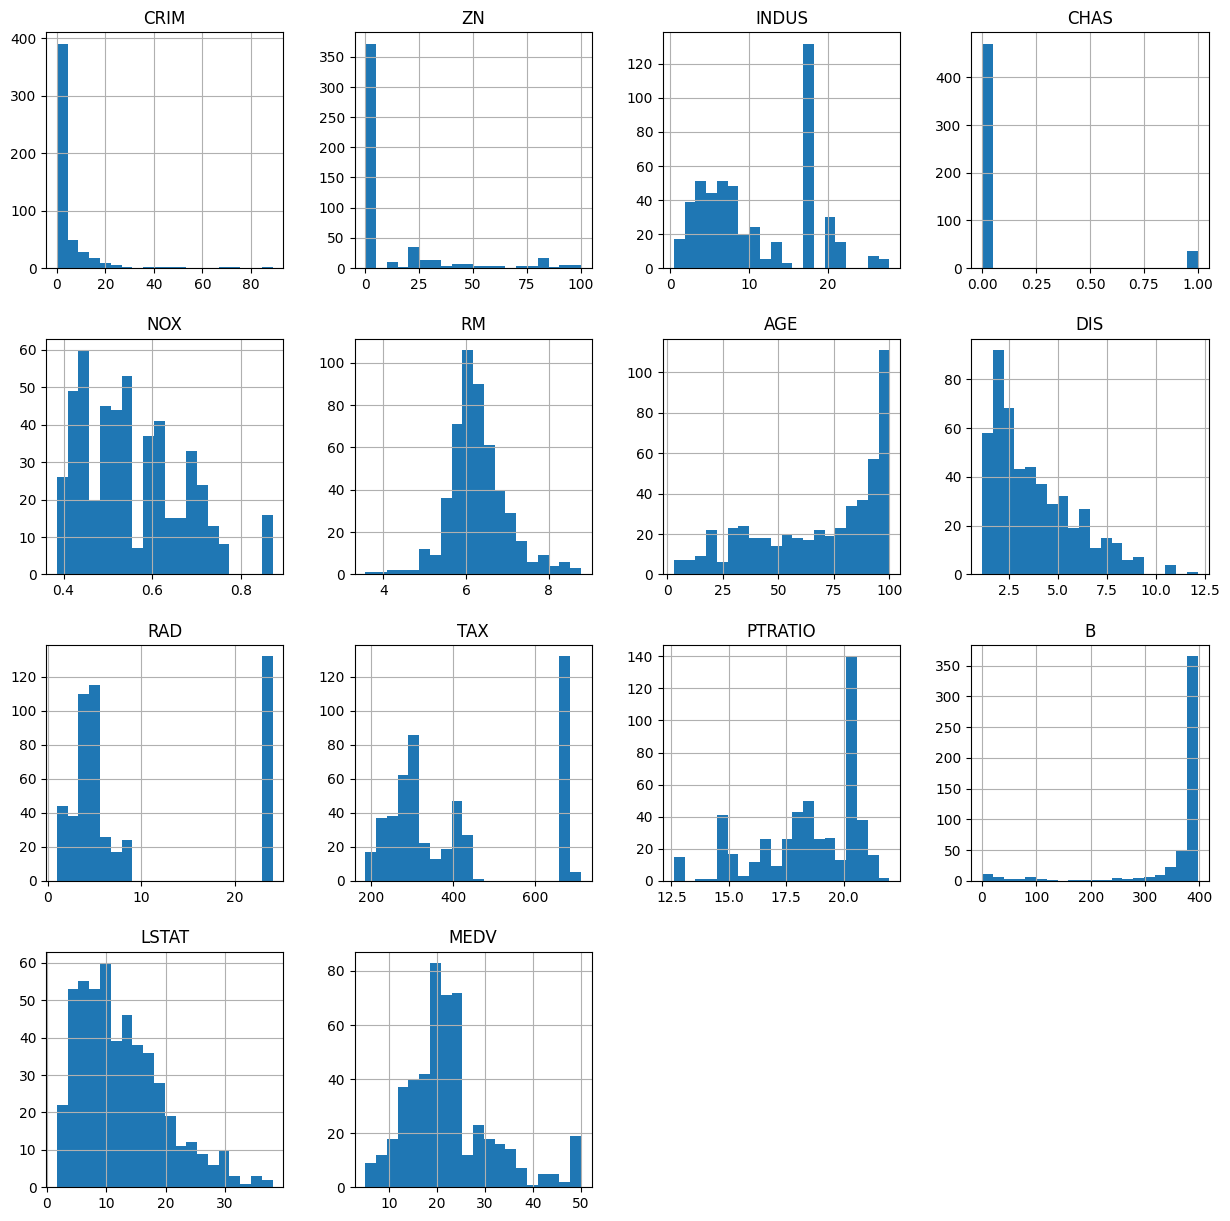

In [14]:
_ = df.hist(bins=20, figsize=(15, 15))

## Train test split
### Manual splitting

In [15]:
def split_train_test(df, test_ratio=0.2, random_state=42):
  np.random.seed(random_state)
  shuffled = np.random.permutation(len(df))

  test_size = math.ceil(len(df) * test_ratio)

  test_indices = shuffled[:test_size]
  train_indices = shuffled[test_size:]

  test_data = df.iloc[test_indices]
  train_data = df.iloc[train_indices]

  return train_data, test_data


train_data, test_data = split_train_test(df, test_ratio=0.1, random_state=1)

train_data.shape
test_data.shape

(455, 14)

(51, 14)

## Using sklearn `train_test_split`

In [16]:
train_data, test_data = train_test_split(df, test_size=0.1, random_state=1)
train_data.shape
test_data.shape

(455, 14)

(51, 14)

In [17]:
train_data['RAD'].value_counts()
test_data['RAD'].value_counts()

RAD
24    117
5     104
4      96
3      35
6      24
8      22
2      22
1      20
7      15
Name: count, dtype: int64

RAD
24    15
4     14
5     11
3      3
7      2
2      2
6      2
8      2
Name: count, dtype: int64

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

In [19]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_indices, test_indices in split.split(df, df['RAD']):
  _train_data = df.iloc[train_indices]
  _test_data = df.iloc[test_indices]

_train_data.shape
_test_data.shape

(404, 14)

(102, 14)

In [20]:
_train_data['RAD'].value_counts()
_test_data['RAD'].value_counts()

RAD
24    105
5      92
4      88
3      30
6      21
2      19
8      19
1      16
7      14
Name: count, dtype: int64

RAD
24    27
5     23
4     22
3      8
6      5
2      5
8      5
1      4
7      3
Name: count, dtype: int64

## Analysis starts here.

**Context:** Housing values in Boston suburbs (1978). 506 instances, 14 attributes.

### Key Attributes
* **CRIM**: Per capita crime rate.
* **ZN**: Proportion of residential land for large lots (>25k sq.ft).
* **INDUS**: Proportion of non-retail business acres.
* **CHAS**: Charles River dummy (1 if bounds river; 0 otherwise).
* **NOX**: Nitric oxides concentration (pollution).
* **RM**: Avg. number of rooms per dwelling.
* **AGE**: % of units built prior to 1940.
* **DIS**: Distance to employment centers.
* **RAD**: Accessibility to radial highways.
* **TAX**: Property-tax rate.
* **PTRATIO**: Pupil-teacher ratio.
* **B**: Proportion of population of Black descent (statistically transformed).
* **LSTAT**: % lower status of the population.
* **MEDV (Target)**: Median value of owner-occupied homes ($1000s).

**Source:** Harrison & Rubinfeld (1978). Missing Values: None.

In [21]:
corr = df.corr().abs()

mask1 = np.triu(np.ones(corr.shape), k=1).astype(bool)
mask2 = corr >= 0.6

corr.where(mask1 & mask2).fillna('-')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,-,-,-,-,-,-,-,-,0.625505,-,-,-,-,-
ZN,-,-,-,-,-,-,-,0.664408,-,-,-,-,-,-
INDUS,-,-,-,-,0.763651,-,0.644779,0.708027,-,0.72076,-,-,0.6038,-
CHAS,-,-,-,-,-,-,-,-,-,-,-,-,-,-
NOX,-,-,-,-,-,-,0.73147,0.76923,0.611441,0.668023,-,-,-,-
RM,-,-,-,-,-,-,-,-,-,-,-,-,0.613808,0.69536
AGE,-,-,-,-,-,-,-,0.747881,-,-,-,-,0.602339,-
DIS,-,-,-,-,-,-,-,-,-,-,-,-,-,-
RAD,-,-,-,-,-,-,-,-,-,0.910228,-,-,-,-
TAX,-,-,-,-,-,-,-,-,-,-,-,-,-,-


In [22]:
high_corr_pairs = list(corr.where(mask1 & mask2).stack().sort_values(ascending=False).index)
high_corr_pairs

[('RAD', 'TAX'),
 ('NOX', 'DIS'),
 ('INDUS', 'NOX'),
 ('AGE', 'DIS'),
 ('LSTAT', 'MEDV'),
 ('NOX', 'AGE'),
 ('INDUS', 'TAX'),
 ('INDUS', 'DIS'),
 ('RM', 'MEDV'),
 ('NOX', 'TAX'),
 ('ZN', 'DIS'),
 ('INDUS', 'AGE'),
 ('CRIM', 'RAD'),
 ('RM', 'LSTAT'),
 ('NOX', 'RAD'),
 ('INDUS', 'LSTAT'),
 ('AGE', 'LSTAT')]

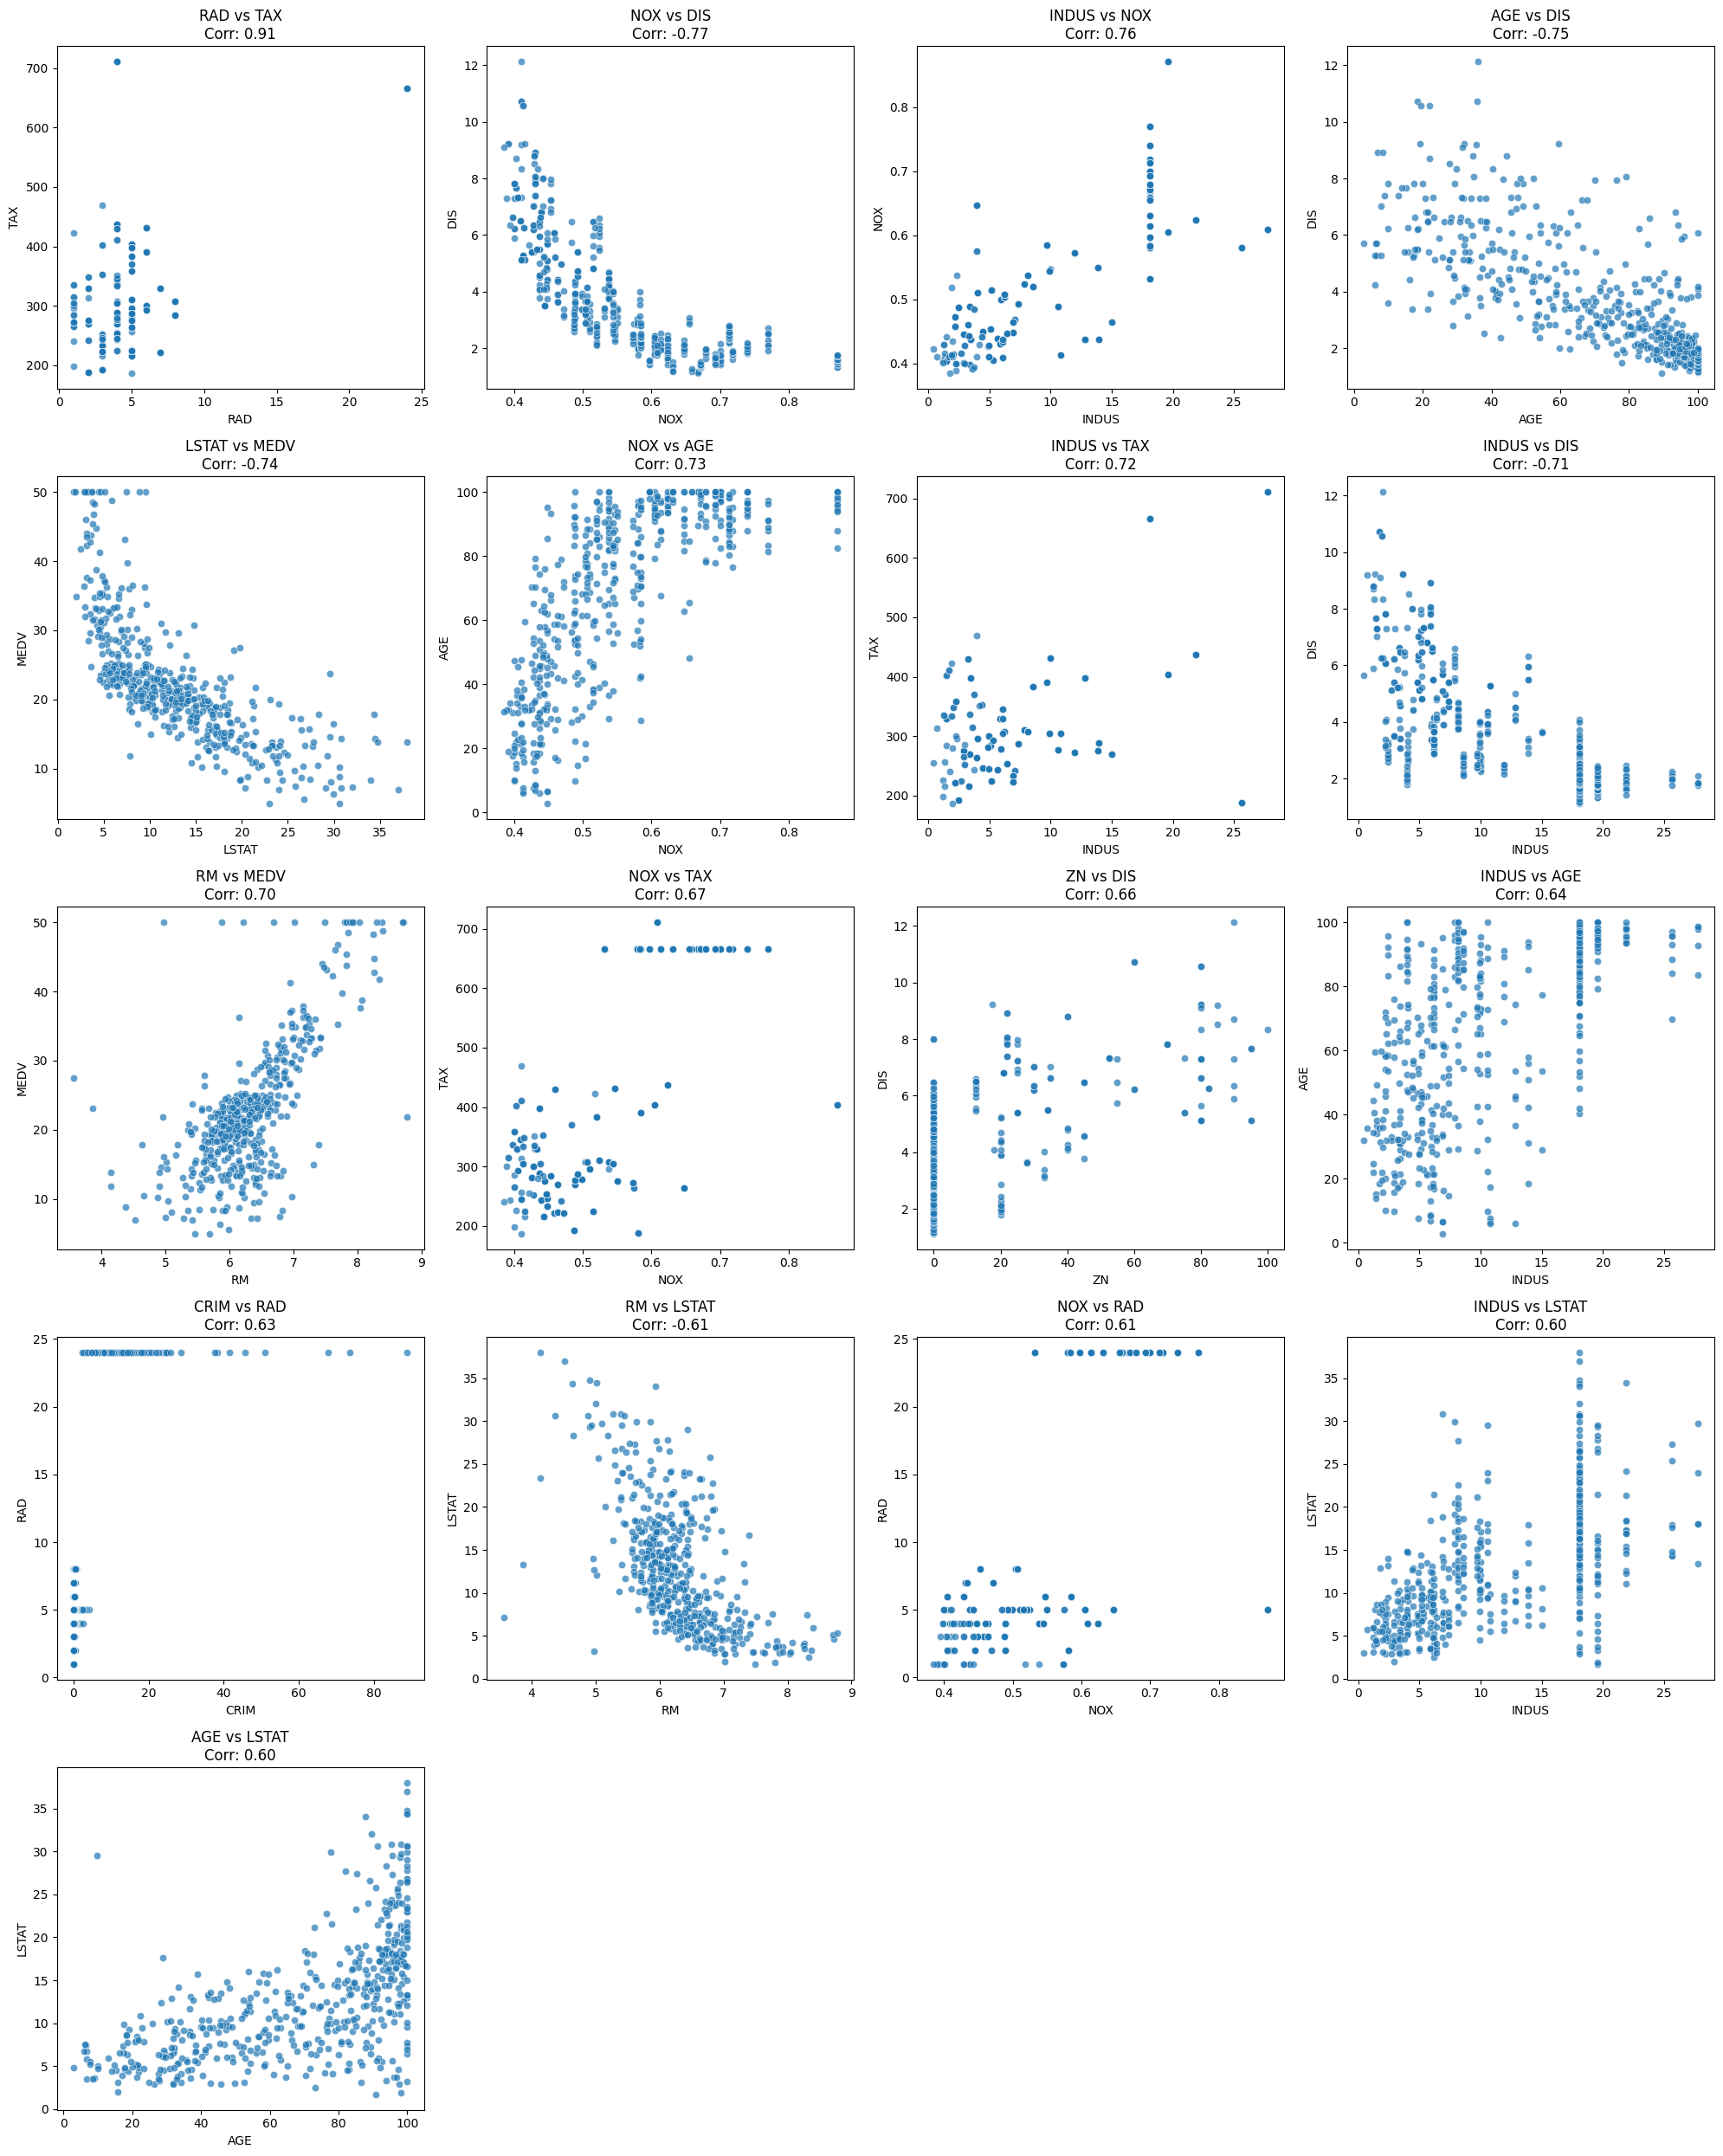

In [23]:
# calculate grid dimensions of plot
n_plots = len(high_corr_pairs)
n_cols = 4
n_rows = math.ceil(n_plots / n_cols)

# create the figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()  # flatten to iterate easily

# iterate to create scatter plot
for i, (col_x, col_y) in enumerate(high_corr_pairs):
  _ = sns.scatterplot(data=df, x=col_x, y=col_y, ax=axes[i], alpha=0.7)
  correlation = df[col_x].corr(df[col_y])
  _ = axes[i].set_title(f'{col_x} vs {col_y}\nCorr: {correlation:.2f}')

# delete empty subplots
for j in range(i+1, len(axes)):
  _ = fig.delaxes(axes[j])

plt.tight_layout()

np.float64(-0.7376627261740147)

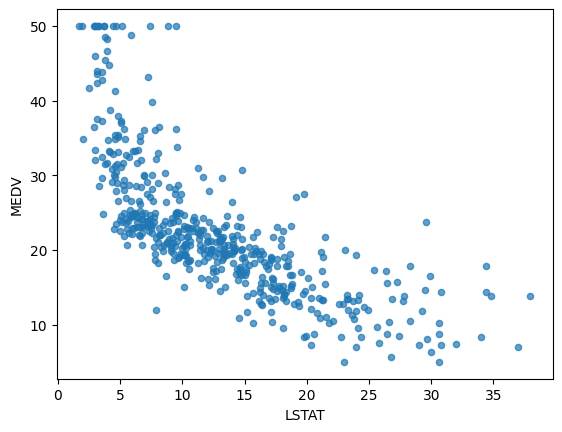

In [24]:
_ = df.plot(kind='scatter', x='LSTAT', y='MEDV', alpha=0.7)

df['LSTAT'].corr(df['MEDV'])

## Trying attribute combinations

In [25]:
df['MEDV'].corr(df['TAX'])
df['MEDV'].corr(df['RM'])
df['MEDV'].corr(df['TAX']/df['RM'])

np.float64(-0.468535933567767)

np.float64(0.6953599470715396)

np.float64(-0.5376496863047937)

In [26]:
df_copy = df.copy()
df_copy['TAX_RM'] = df['TAX']/df['RM']
df_copy.shape

(506, 15)

## Splitting features and label

In [27]:
X = df.iloc[:, :-1]  # features
y = df.iloc[:, -1]  # label/target var

X.shape
y.shape

(506, 13)

(506,)

## Imputation: dealing missing values

In [33]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [34]:
X_copy = X.copy()
X_copy.loc[:9, ['RM']] = pd.NA
X_copy.loc[:4, ['TAX']] = pd.NA
X_copy.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM         10
AGE         0
DIS         0
RAD         0
TAX         5
PTRATIO     0
B           0
LSTAT       0
dtype: int64

In [35]:
# Drop the columns having missing values
X_copy.drop(columns=['RM', 'TAX']).shape

(506, 11)

In [ ]:
# Drop the rows having missing values
X_copy.dropna().shape
X_copy.dropna(subset=['TAX']).shape

(496, 14)

(501, 14)

In [36]:
# Fill the missing values with mean/median/mode values of respective columns
X_copy['TAX'].fillna(X_copy['TAX'].mean()).isnull().sum()
X_copy['RM'].fillna(X_copy['RM'].median()).isnull().sum()

np.int64(0)

np.int64(0)

## Using `SimpleImputer` from sklearn

In [38]:
from sklearn.impute import SimpleImputer

In [42]:
imputer = SimpleImputer(strategy='median')
imputer.fit(X_copy)

SimpleImputer(strategy='median')

In [45]:
X_copy.median().values
imputer.statistics_

array([2.56510e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.20500e+00, 7.75000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02,
       1.90500e+01, 3.91440e+02, 1.13600e+01])

array([2.56510e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.20500e+00, 7.75000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02,
       1.90500e+01, 3.91440e+02, 1.13600e+01])

In [57]:
X_imputed = pd.DataFrame(imputer.transform(X_copy), columns=X_copy.columns)
X_imputed.isnull().sum().sum()

np.int64(0)

### Feature scaling

- min-max scaling - Values are from 0 to 1
- standard scaling - Values are such that mean = 0, SD = 1

In [60]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [66]:
scalar = StandardScaler()
scalar.fit(X)
pd.DataFrame(scalar.transform(X), columns=X.columns)

StandardScaler()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [69]:
scalar = MinMaxScaler()
scalar.fit(X)
pd.DataFrame(scalar.transform(X), columns=X.columns)

MinMaxScaler()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


## Preprocessing pipeline

In [70]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('SimpleImputer', SimpleImputer(strategy='median')),
    ('StandardScaler', StandardScaler())
])

In [74]:
pipeline.fit(X)
X_tr = pd.DataFrame(pipeline.transform(X), columns=X.columns)
X_tr

Pipeline(steps=[('SimpleImputer', SimpleImputer(strategy='median')),
                ('StandardScaler', StandardScaler())])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


## Model selection

In [76]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_tr, y, test_size=0.2, random_state=42)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(404, 13)

(102, 13)

(404,)

(102,)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

In [85]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
root_mean_squared_error(y_test, y_pred)

LinearRegression()

4.928602182665336

In [86]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
root_mean_squared_error(y_test, y_pred)

DecisionTreeRegressor()

3.4745432765173843

In [87]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
root_mean_squared_error(y_test, y_pred)

RandomForestRegressor()

3.1354951762042313

In [101]:
data = df.sample(5)
X_sample = data.iloc[:, :-1]  # feature
X_sample = pd.DataFrame(pipeline.transform(X_sample), columns=X_sample.columns)
y_sample = data.iloc[:, -1].values  # target

X_sample.shape
y_sample.shape

(5, 13)

(5,)

In [103]:
y_pred = model.predict(X_sample)
root_mean_squared_error(y_sample, y_pred)

y_sample
y_pred

1.2833024585030612

array([28.2, 18.4, 50. , 43.1, 12.1])

array([29.642, 18.074, 47.553, 43.199, 11.874])

## Cross validation scores

In [104]:
from sklearn.model_selection import cross_val_score

In [107]:
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=10)
scores

array([  -1.23349291,  -15.079739  ,   -3.8747069 ,  -11.2062035 ,
        -18.1561331 ,   -7.1043652 ,   -4.3690277 ,  -16.1624297 ,
         -2.2433298 , -109.3655353 ])

In [111]:
rmse_scores = np.sqrt(-scores)
rmse_scores
rmse_scores.mean()
rmse_scores.std()

array([ 1.11062726,  3.88326396,  1.96842752,  3.3475668 ,  4.26100142,
        2.66540151,  2.09022193,  4.02025244,  1.49777495, 10.45779782])

np.float64(3.530233561282293)

np.float64(2.5331694206478224)